# MVP Análise de Dados e Boas Práticas

**Nome:** Carolina de Noronha Figueiredo Vieira da Cunha

**Matrícula:** 4052025000199

**Dataset:** [Wine Quality Dataset](https://archive.ics.uci.edu/dataset/186/wine+quality)



# Descrição do Problema

Este projeto tem como base o conjunto de dados Wine Quality, que reúne informações físico-químicas e sensoriais de vinhos da região portuguesa de Vinho Verde. As variáveis incluem características como acidez, teor alcoólico, açúcar residual, pH, entre outras, além de uma nota de qualidade atribuída por especialistas, variando de 0 a 10.

Por preferência pessoal, optou-se por trabalhar exclusivamente com os dados de vinhos brancos, que representam uma parte significativa do dataset original.

O objetivo deste MVP é realizar a análise e o pré-processamento de dados verificando correlações e obtendo insights, bem como treinar um modelo que busque prever a qualidade do vinho com base em suas propriedades físico-químicas. Para isso, foram formuladas hipóteses, realizadas análises estatísticas e aplicados modelos de aprendizado de máquina, com foco em interpretar os fatores que mais influenciam na percepção sensorial do vinho.

## Hipóteses do Problema

As hipóteses traçadas são as seguintes:

- Qual a correlação entre o teor alcoólico e o açucar residual?

- É possível distinguir vinhos de diferentes níveis de qualidade com base em suas características físico-químicas?

- Vinhos bons são mais facilmente identificáveis?


## Tipo de Problema

Este é um problema de **classificação binária supervisionada**. Dado um conjunto de variáveis da composição do vinho, o objetivo é prever qual deles pode ser considerado bom (nota acima de 6).

## Seleção de Dados

O dataset Wine Quality é um conjunto de dados bem estruturado e amplamente utilizado em estudos de ciência de dados.

## Atributos do Dataset

O dataset Wine Quality (vinhos brancos) contém 4.898 amostras de vinho, cada uma descrita por 11 atributos físico-químicos e 1 atributo sensorial de qualidade. Os atributos são:

fixed acidity – acidez fixa (g/dm³)

volatile acidity – acidez volátil (g/dm³)

citric acid – ácido cítrico (g/dm³)

residual sugar – açúcar residual (g/dm³)

chlorides – cloretos (g/dm³)

free sulfur dioxide – dióxido de enxofre livre (mg/dm³)

total sulfur dioxide – dióxido de enxofre total (mg/dm³)

density – densidade (g/cm³)

pH – nível de acidez (sem unidade)

sulphates – sulfatos (g/dm³)

alcohol – teor alcoólico (% vol)

quality – nota de qualidade sensorial (inteiro de 0 a 10)

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização, pré-processamento dos dados, construção de modelos preditivos e avaliação de desempenho, bem como o carregamento inicial do dataset Wine Quality.

In [102]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix



In [144]:
# Carregamento do dataset de vinhos brancos

url = 'https://raw.githubusercontent.com/CunhaCarol/WINE/refs/heads/main/winequality-white.csv'
wine = pd.read_csv(url_white, sep=';')

In [139]:
# Guardando o dataset em um DataFrame
X = wine.drop('quality', axis=1)
y = wine['quality']

df = pd.DataFrame(data=X, columns=X.columns)
df['quality'] = y

In [140]:
# Exibindo as primeiras linhas
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Análise de Dados

Nesta fase de exploração inicial dos dados do dataset Wine Quality (vinhos brancos), o objetivo é investigar como as variáveis físico-químicas se comportam e se relacionam com a qualidade do vinho. Essa etapa é essencial para revelar padrões, identificar possíveis outliers e orientar as decisões nas próximas fases de preparação dos dados e construção de modelos preditivos.

## Total e Tipo das Instâncias

O dataset de vinhos brancos possui 4898 instâncias (observações), cada uma representando uma amostra de vinho. A variável quality é do tipo categórico ordinal, representando a nota de qualidade atribuída ao vinho (de 3 a 9). As demais variáveis, como alcohol, residual sugar, pH, entre outras, são numéricas contínuas (tipo float), correspondendo a características físico-químicas medidas em laboratório.

In [106]:
# Total de instâncias
print(f"Total de instâncias no dataset: {len(df)}")

# Tipos de dados por coluna
print("\nTipos de dados por coluna:")
df_info = df.dtypes.reset_index()
df_info.columns = ['Atributo', 'Tipo de Dado']
print(df_info.to_string(index=False))


Total de instâncias no dataset: 4898

Tipos de dados por coluna:
            Atributo Tipo de Dado
       fixed acidity      float64
    volatile acidity      float64
         citric acid      float64
      residual sugar      float64
           chlorides      float64
 free sulfur dioxide      float64
total sulfur dioxide      float64
             density      float64
                  pH      float64
           sulphates      float64
             alcohol      float64
             quality        int64


In [107]:
#buscando valores nulos
df.isnull().values.any()

np.False_

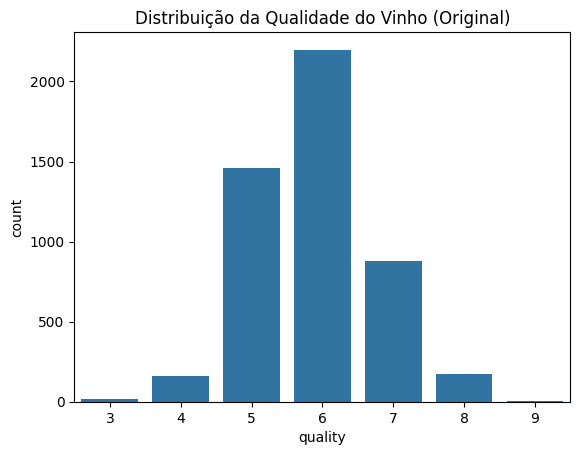

In [108]:
# Distribuição da variável alvo original
# Mostra como os vinhos estão distribuídos por nota original (não binária)

sns.countplot(x='quality', data=df)
plt.title('Distribuição da Qualidade do Vinho (Original)')
plt.show()


O gráfico de barras mostra que as amostras de vinho branco estão distribuídas de forma desigual entre as diferentes notas de qualidade. A maioria dos vinhos recebeu notas entre 5 e 7, indicando que o dataset não é equilibrado, ou seja, tem muito mais exemplos de vinhos "médios" do que de vinhos "muito bons" ou "muito ruins".

## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [109]:
# estatísticas descritivas básicas do dataset
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Pelos dados estatísticos básicos nota-se que o dataset é heterogêneo, com indícios de distribuições assimétricas e outliers relevantes. Abaixo podemos verificá-los visualmente.

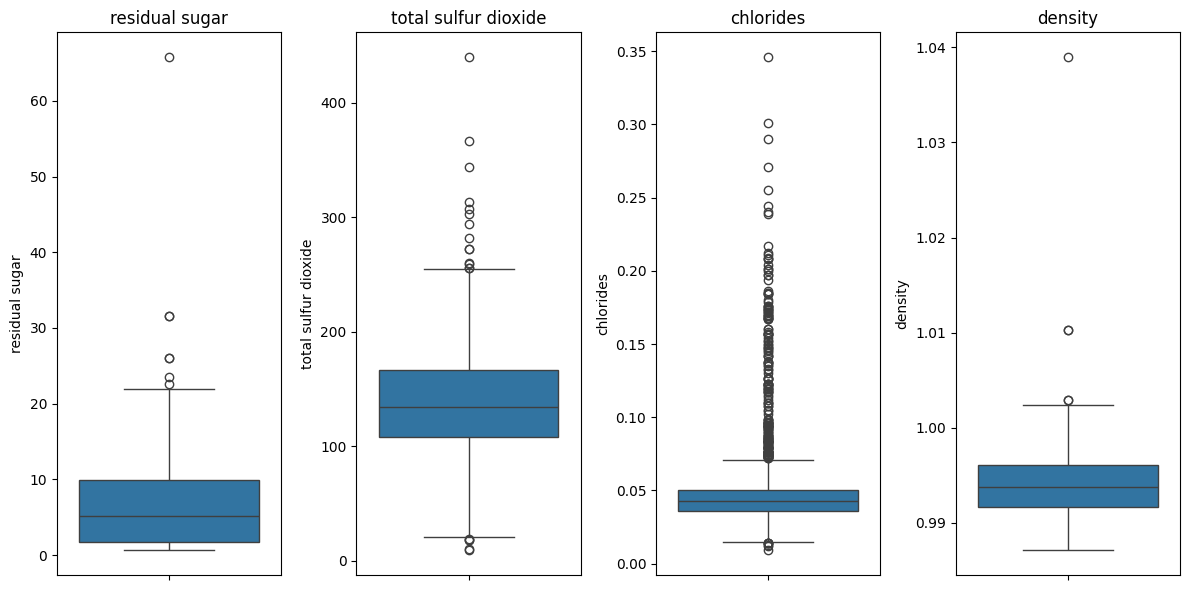

In [143]:
# Boxplots das variáveis com potencial outlier
cols = ['residual sugar', 'total sulfur dioxide', 'chlorides', 'density']
plt.figure(figsize=(12, 6))
for i, col in enumerate(cols, 1):
    plt.subplot(1, len(cols), i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [110]:
# média dos atributos numéricos do dataset
df.describe().loc['mean']

,mean
fixed acidity,6.854788
volatile acidity,0.278241
citric acid,0.334192
residual sugar,6.391415
chlorides,0.045772
free sulfur dioxide,35.308085
total sulfur dioxide,138.360657
density,0.994027
pH,3.188267
sulphates,0.489847


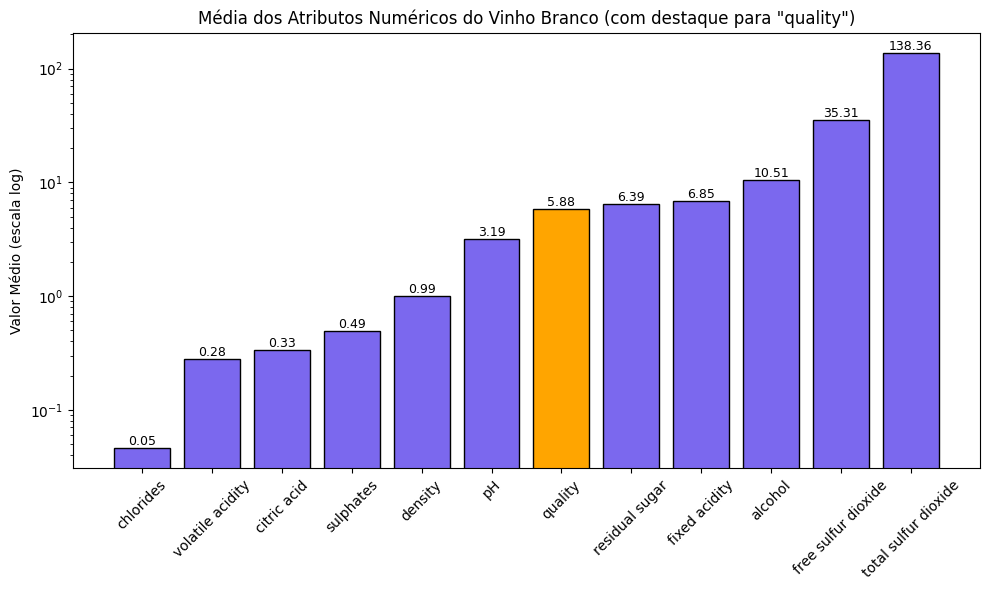

In [111]:
# Qual gráfico seria interessante usar pra mostrar a média?

# Calcular a média dos atributos numéricos
mean_values = df.describe().loc['mean']

# Ordenar os valores para melhor visualização
mean_sorted = mean_values.sort_values()

# Definir cores, destacando o atributo 'quality'
colors = ['orange' if attr == 'quality' else 'mediumslateblue' for attr in mean_sorted.index]

# Criar gráfico de barras com escala logarítmica no eixo y
plt.figure(figsize=(10, 6))
bars = plt.bar(mean_sorted.index, mean_sorted.values, color=colors, edgecolor='black')

# Adicionar rótulos de valor nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}',
        ha='center', va='bottom', fontsize=9)

# Configurações do gráfico
plt.yscale('log') # Escala logarítmica para melhor visualização
plt.title('Média dos Atributos Numéricos do Vinho Branco (com destaque para "quality")')
plt.ylabel('Valor Médio (escala log)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [112]:
# desvio padrão dos atributos numéricos do dataset
df.describe().loc['std']

,std
fixed acidity,0.843868
volatile acidity,0.100795
citric acid,0.121020
residual sugar,5.072058
chlorides,0.021848
free sulfur dioxide,17.007137
total sulfur dioxide,42.498065
density,0.002991
pH,0.151001
sulphates,0.114126


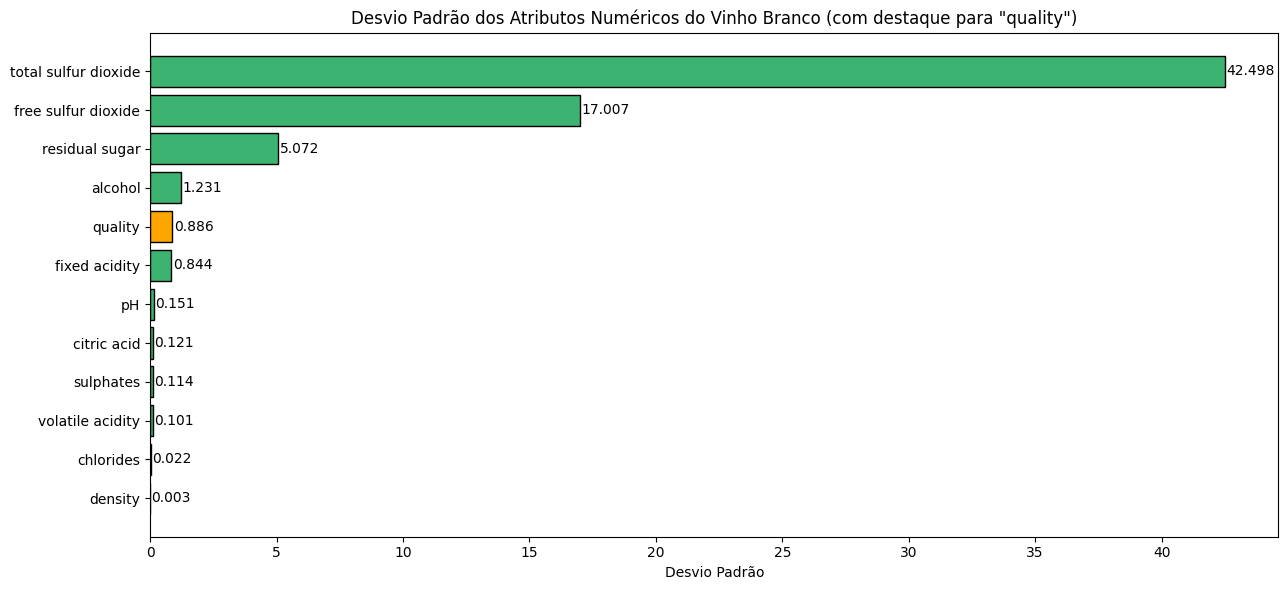

In [113]:
# Qual gráfico seria interessante usar pra mostrar o desvio padrão?


# Obter os desvios padrão do DataFrame
std_values = df.describe().loc['std']

# Converter para Series e ordenar
std_series = pd.Series(std_values).sort_values()

# Definir cores: destacar 'quality' com uma cor diferente
colors = ['orange' if attr == 'quality' else 'mediumseagreen' for attr in std_series.index]

# Criar gráfico de barras horizontais
plt.figure(figsize=(13, 6))
bars = plt.barh(std_series.index, std_series.values, color=colors, edgecolor='black')

# Adicionar rótulos de valor
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2, f'{width:.3f}', va='center')

# Título e rótulos
plt.title('Desvio Padrão dos Atributos Numéricos do Vinho Branco (com destaque para "quality")')
plt.xlabel('Desvio Padrão')
plt.tight_layout()
plt.show()


## Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

### *Quality*



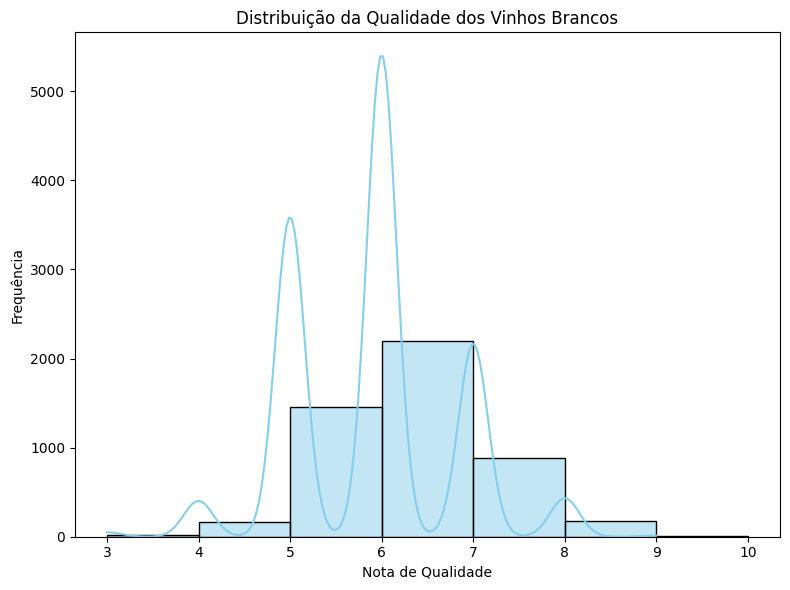

In [114]:
# Histograma da variável 'quality' com curva de densidade
plt.figure(figsize=(8, 6))
sns.histplot(df['quality'], kde=True, bins=range(int(df['quality'].min()), int(df['quality'].max()) + 2),
      color='skyblue', edgecolor='black')
plt.title('Distribuição da Qualidade dos Vinhos Brancos')
plt.xlabel('Nota de Qualidade')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()


A distribuição dos dados revela como as notas de qualidade dos vinhos brancos estão espalhadas, indicando com que frequência cada nota ocorre. Compreender essa distribuição é essencial na análise, pois permite identificar padrões, como a tendência central em torno da nota 6, a dispersão das avaliações e a raridade de notas extremas, como 3 ou 10. O histograma, acompanhado da curva de densidade (KDE), é uma ferramenta visual poderosa para representar essa distribuição. Ele mostra que os dados são levemente assimétricos, com uma única concentração principal (unimodal), o que sugere uma predominância de vinhos com qualidade mediana e poucos casos fora do padrão.

### *Alcohol*



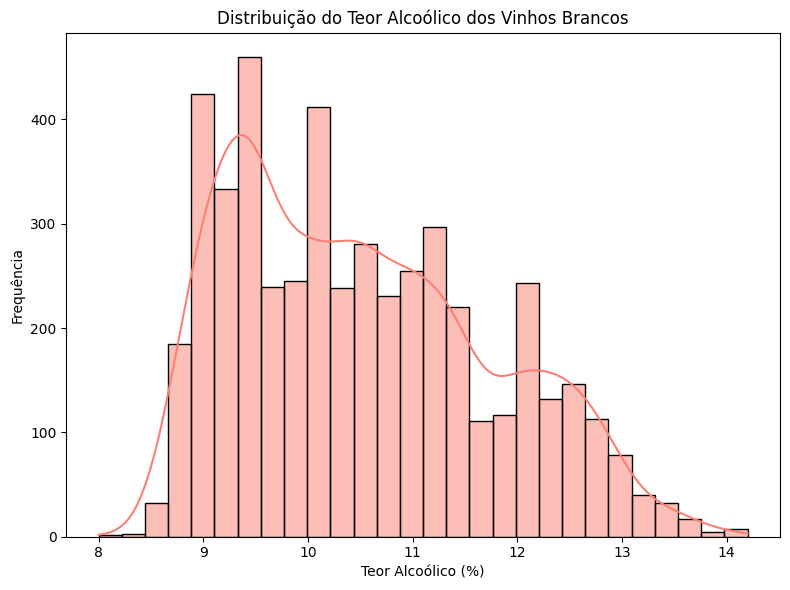

In [115]:
# Histograma para a variável 'alcohol'
plt.figure(figsize=(8, 6))
sns.histplot(df['alcohol'], kde=True, color='salmon', edgecolor='black')
plt.title('Distribuição do Teor Alcoólico dos Vinhos Brancos')
plt.xlabel('Teor Alcoólico (%)')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()


A distribuição do atributo Alcohol é concentrada e unimodal, com a maioria dos vinhos apresentando um teor alcoólico moderado. Isso sugere uma certa padronização na produção de vinhos brancos, provavelmente voltada para um perfil sensorial equilibrado.

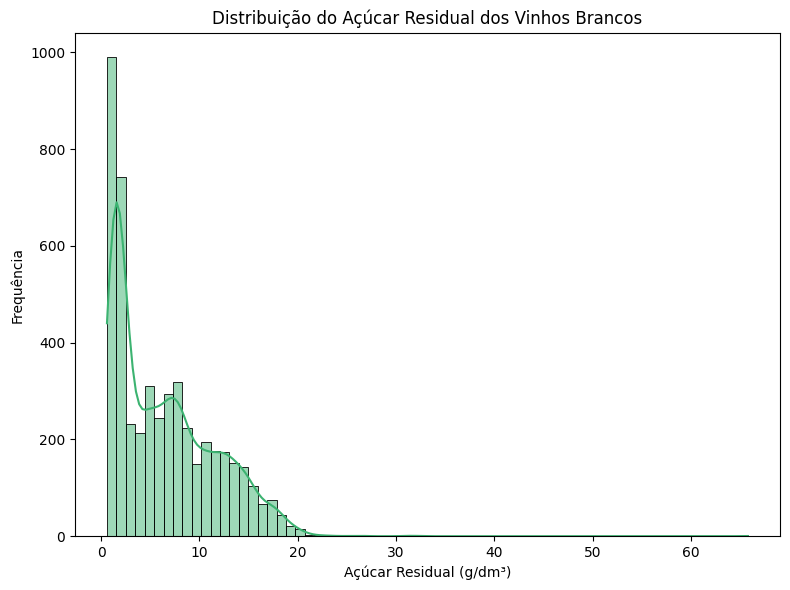

In [116]:
# Histograma para a variável 'residual sugar'
plt.figure(figsize=(8, 6))
sns.histplot(df['residual sugar'], kde=True, color='mediumseagreen', edgecolor='black')
plt.title('Distribuição do Açúcar Residual dos Vinhos Brancos')
plt.xlabel('Açúcar Residual (g/dm³)')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()


A maioria dos vinhos brancos da amostra é seco ou levemente doce, com poucos exemplares muito doces. Isso pode indicar uma preferência de mercado ou um padrão de produção voltado para vinhos mais leves e refrescantes.

## Boxplot

Para entender as diferenças entre os vinhos, devemos observar como os atributos químicos se comportam quando agrupados por nota de qualidade. Isso nos permite comparar a média, mediana e desvio padrão de cada característica para vinhos com diferentes avaliações, além de visualizar suas distribuições por meio de boxplots. Essa abordagem ajuda a identificar padrões que distinguem vinhos de qualidade inferior, média e superior.


In [117]:
# Estatísticas descritivas agrupadas por nota de qualidade
df.groupby('quality').agg(['mean', 'median', 'std'])


fixed acidity                  volatile acidity                   \
                 mean median       std             mean median       std   
quality                                                                    
3            7.600000    7.3  1.724743         0.333250   0.26  0.140827   
4            7.129448    6.9  1.081490         0.381227   0.32  0.173463   
5            6.933974    6.8  0.838433         0.302011   0.28  0.100066   
6            6.837671    6.8  0.837442         0.260564   0.25  0.088142   
7            6.734716    6.7  0.755670         0.262767   0.25  0.091106   
8            6.657143    6.8  0.819337         0.277400   0.26  0.108029   
9            7.420000    7.1  0.983362         0.298000   0.27  0.057619   

        citric acid                  residual sugar  ...   density        pH  \
               mean median       std           mean  ...       std      mean   
quality                                              ...                       
3          0.336000  0.345  0.081460       6.392500  ...  0.002831  3.187500   
4          0.304233  0.290  0.163857       4.628221  ...  0.002462  3.182883   
5          0.337653  0.320  0.140814       7.334969  ...  0.002545  3.168833   
6          0.338025  0.320  0.119325       6.441606  ...  0.003024  3.188599   
7          0.325625  0.310  0.079183       5.186477  ...  0.002768  3.213898   
8          0.326514  0.320  0.085439       5.671429  ...  0.002788  3.218686   
9          0.386000  0.360  0.082037       4.120000  ...  0.003118  3.308000   

                         sulphates                     alcohol         \
        median       std      mean median       std       mean median   
quality                                                                 
3        3.215  0.209834  0.474500   0.44  0.119845  10.345000  10.45   
4        3.160  0.163691  0.476135   0.47  0.117973  10.152454  10.10   
5        3.160  0.140895  0.482203   0.47  0.098205   9.808840   9.50   
6        3.180  0.150996  0.491106   0.48  0.113357  10.575372  10.50   
7        3.200  0.158402  0.503102   0.48  0.130195  11.367936  11.40   
8        3.230  0.152289  0.486229   0.46  0.147073  11.636000  12.00   
9        3.280  0.082885  0.466000   0.46  0.092628  12.180000  12.50   

                   
              std  
quality            
3        1.224089  
4        1.003217  
5        0.847065  
6        1.147776  
7        1.246536  
8        1.280138  
9        1.013410  

[7 rows x 33 columns]

### Teor alcoólico


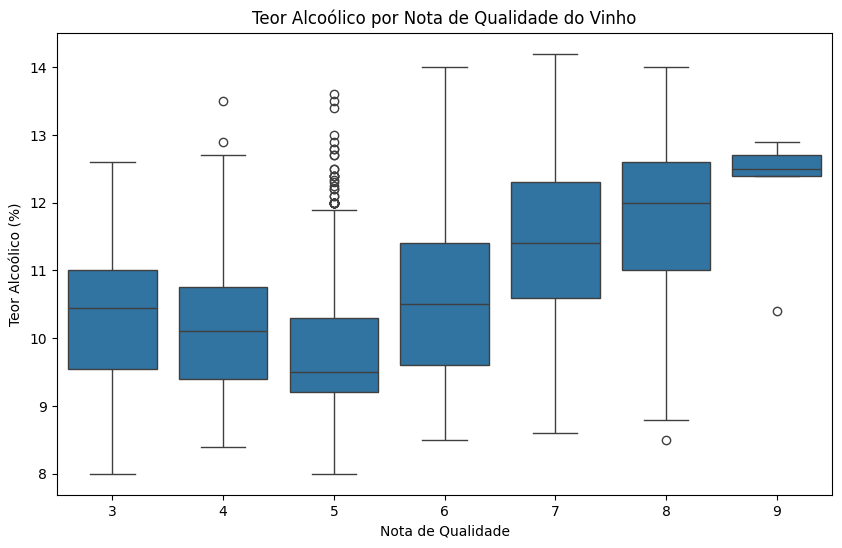

In [118]:
# Boxplot do teor alcoólico por qualidade do vinho
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title('Teor Alcoólico por Nota de Qualidade do Vinho')
plt.xlabel('Nota de Qualidade')
plt.ylabel('Teor Alcoólico (%)')
plt.show()

Esse gráfico mostra que, em geral, vinhos com mais álcool ganham notas mais altas. Mas na nota 5, aparecem vários vinhos com teor alcoólico alto, que ainda assim não foram bem avaliados. Isso mostra que o álcool ajuda, mas não é tudo na hora de decidir se um vinho é bom ou não.

### Teor de açúcar

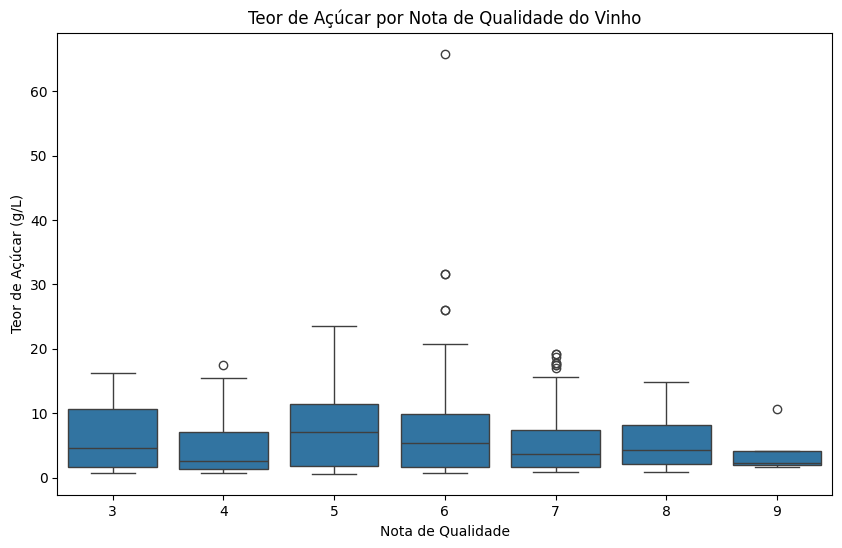

In [119]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='residual sugar', data=df)
plt.title('Teor de Açúcar por Nota de Qualidade do Vinho')
plt.xlabel('Nota de Qualidade')
plt.ylabel('Teor de Açúcar (g/L)')
plt.show()

Embora a maioria dos vinhos, independentemente da nota, tenha teor de açúcar baixo, há uma presença marcante de outliers nas notas 6 e 7, com vinhos bem mais doces. Isso pode indicar que um teor elevado de açúcar não compromete necessariamente a qualidade percebida — ao contrário, alguns vinhos doces podem até ser bem avaliados. Ainda assim, não há um padrão claro de aumento ou redução do açúcar conforme a qualidade sobe.

## Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

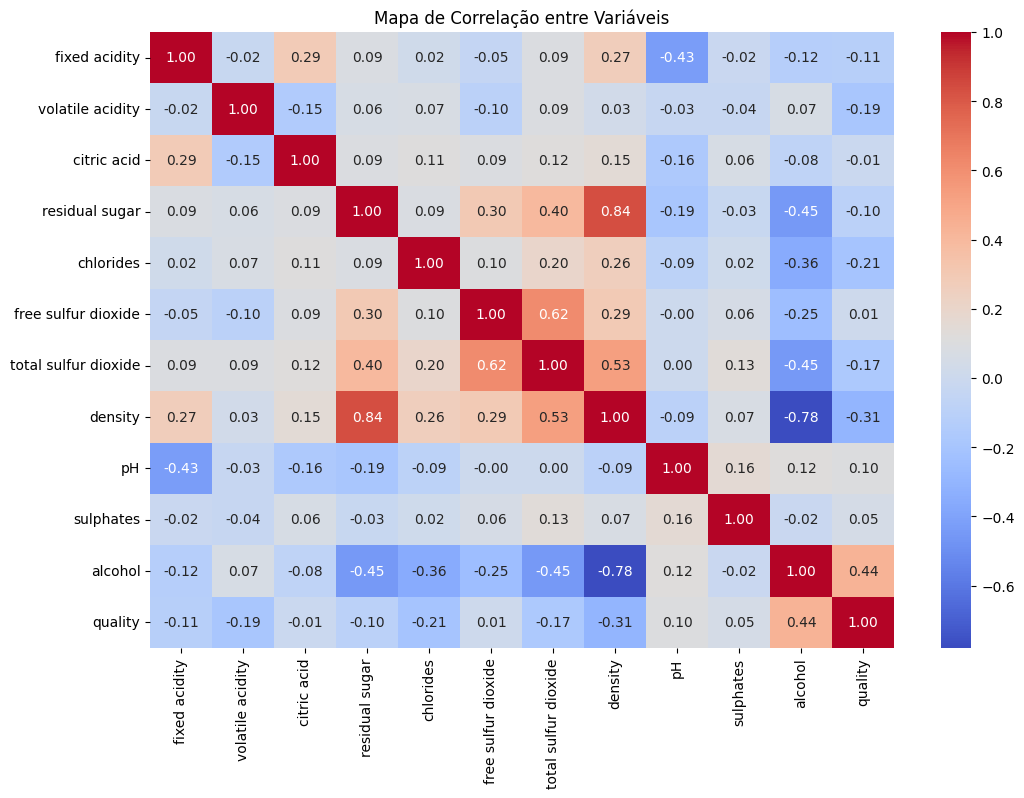

In [120]:
#Heatmap de correlação
#Ajuda a identificar quais variáveis são mais correlacionadas entre si (ex: açúcar x densidade).

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Correlação entre Variáveis')
plt.show()

A qualidade percebida do vinho neste conjunto de dados está mais fortemente ligada a características sensoriais como teor alcoólico e acidez volátil, do que a características como doçura ou densidade. Algumas variáveis explicam bem umas às outras (como açúcar e densidade), mas isso não significa que influenciam a nota final. O que importa mesmo parece ser o equilíbrio químico e sensorial do vinho.

# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [121]:
# Criando uma variável binária: bom (qualidade >= 6) vs ruim
# transformando a variável quality (que varia de 0 a 10) em uma variável binária:

# 1 = vinho bom (nota 6 ou mais)

# 0 = vinho ruim (nota abaixo de 6)
df['qualidade_binaria'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)

In [122]:
# Separando variáveis independentes e dependente
# X = todas as variáveis explicativas (ex: acidez, açúcar, álcool etc.)
# y = variável de saída (alvo): 0 ou 1, que representa se o vinho é ruim ou bom

X = df.drop(['quality', 'qualidade_binaria'], axis=1)
y = df['qualidade_binaria']

In [123]:
# Treino/teste split
# Separar os dados em dois conjuntos: 70% para treinar o modelo e 30% para testar se o modelo aprendeu bem

# random_state garante que o resultado seja sempre o mesmo ao rodar novamente.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (3428, 11)
Dimensões de X_test: (1470, 11)
Dimensões de y_train: (3428,)
Dimensões de y_test: (1470,)


X_train: (3428, 11) - 3428 amostras de treino e 11 variáveis preditoras (colunas), como álcool, acidez, açúcar etc.

X_test: (1470, 11) - O conjunto de teste tem 1470 amostras, com as mesmas 11 variáveis.

y_train: (3428,) - A série y_train contém os rótulos (0 ou 1) correspondentes aos 3428 vinhos de treino.

y_test: (1470,) - Os rótulos dos 1470 vinhos de teste.

## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.


In [124]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [125]:
# Aprende min e max APENAS de X_train
scaler_norm.fit(X_train)
X_train_normalized = scaler_norm.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_normalized = scaler_norm.transform(X_test)

In [126]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)

In [127]:
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_normalized.head())


Primeiras 5 linhas dos dados normalizados (treino):
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         0.3500          0.166667     0.180723        0.211656   0.127596   
1         0.5000          0.176471     0.295181        0.039877   0.053412   
2         0.3125          0.147059     0.198795        0.013804   0.080119   
3         0.2750          0.176471     0.108434        0.098160   0.136499   
4         0.5125          0.284314     0.186747        0.034509   0.083086   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.257840              0.581513  0.209948  0.272727   0.333333   
1             0.174216              0.258824  0.092346  0.281818   0.119048   
2             0.083624              0.319328  0.074995  0.545455   0.238095   
3             0.327526              0.618487  0.169655  0.445455   0.250000   
4             0.013937              0.047059  0.076923  0.427273   0.166667   

   

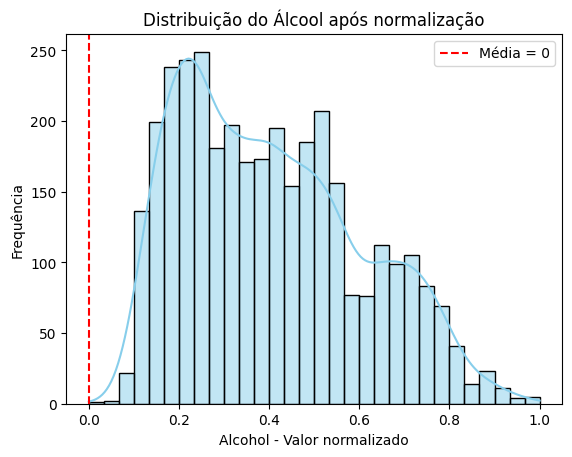

In [128]:
# Visualização da distribuição após a normalização (exemplo para uma característica)
sns.histplot(df_normalized['alcohol'], kde=True, bins=30, color='skyblue')
plt.title('Distribuição do Álcool após normalização')
plt.xlabel('Alcohol - Valor normalizado')
plt.ylabel('Frequência')
plt.axvline(0, color='red', linestyle='--', label='Média = 0')
plt.legend()
plt.show()

O histograma após a normalização mostra que os valores foram escalados para o intervalo de 0 a 1, mantendo a forma da distribuição original.

## Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [129]:
# Padronização dos dados

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criando o DataFrame a partir dos dados padronizados
df_padronizado = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [130]:
# Exibindo as primeiras linhas
print(df_padronizado.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.311323         -0.287801    -0.276453        1.550669   0.294202   
1       1.104707         -0.189354     1.300665       -0.625521  -0.861672   
2      -0.665330         -0.484694    -0.027435       -0.955835  -0.445558   
3      -1.019337         -0.189354    -1.272528        0.112829   0.432906   
4       1.222709          0.893557    -0.193447       -0.693527  -0.399323   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.282113              1.067240  1.300650 -1.130319   0.094073   
1            -0.431426             -1.219627 -0.709478 -1.063548  -1.492780   
2            -1.204425             -0.790840 -1.006054  0.872818  -0.611195   
3             0.876728              1.329277  0.611934  0.138334  -0.523036   
4            -1.799040             -2.720384 -0.973101  0.004792  -1.140146   

    alcohol  
0 -1.146859  
1  0.642575  
2  0.561237  


Gráfico comparativo da distribuição do teor de álcool antes e depois da padronização

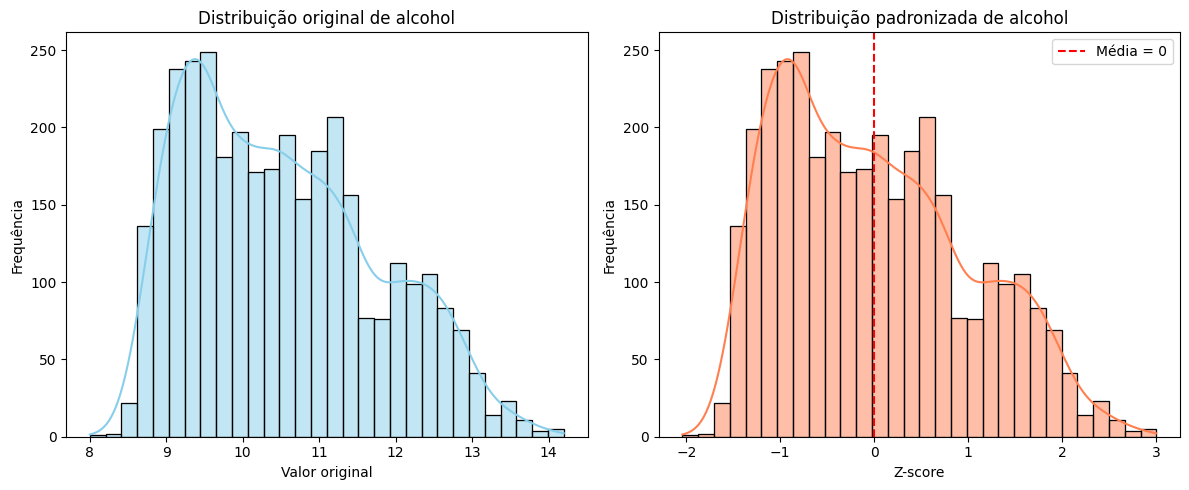

In [131]:
variavel = 'alcohol'

# Criando DataFrames para facilitar a visualização
df_original = pd.DataFrame(X_train, columns=X_train.columns)
df_padronizado = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Criando a comparação gráfica
plt.figure(figsize=(12, 5))

# Gráfico original
plt.subplot(1, 2, 1)
sns.histplot(df_original[variavel], kde=True, bins=30, color='skyblue')
plt.title(f'Distribuição original de {variavel}')
plt.xlabel('Valor original')
plt.ylabel('Frequência')

# Gráfico padronizado
plt.subplot(1, 2, 2)
sns.histplot(df_padronizado[variavel], kde=True, bins=30, color='coral')
plt.title(f'Distribuição padronizada de {variavel}')
plt.xlabel('Z-score')
plt.ylabel('Frequência')
plt.axvline(0, color='red', linestyle='--', label='Média = 0')
plt.legend()

plt.tight_layout()
plt.show()

A padronização mostra que os valores foram transformados para ter uma média próxima de zero e um desvio padrão de um, centralizando a distribuição.

## Tratamento de Valores Nulos

O dataset Wine Quality original não possui valores nulos. No entanto, o tratamento de valores nulos é crucial e pode envolver imputação (preenchimento com média, mediana, moda) ou remoção de linhas/colunas.

In [132]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset Wine Quality:")
df.isnull().sum()

Valores nulos no dataset Wine Quality:


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


## Outras Transformações e Etapas de Pré-Processamento

Outras etapas de pré-processamento incluem a seleção de características, redução de dimensionalidade (como PCA) ou criação de novas características (feature engineering). O que você faria a mais?

## Criação de variáveis derivadas

In [133]:
#Índice de fermentação
df['indice_fermentacao'] = df['alcohol'] / (df['residual sugar'] + 0.1)

#Densidade ajustada pelo álcool
df['densidade_corrigida'] = df['density'] / df['alcohol']

#Intensidade da acidez total
df['acidez_total'] = df['fixed acidity'] + df['volatile acidity'] + df['citric acid']


Correlação entre as novas variáveis derivadas e a variável de qualidade dos vinhos

In [134]:
# Lista com os nomes das novas variáveis derivadas
novas_features = ['indice_fermentacao',
                  'densidade_corrigida',
                  'acidez_total']

# Calculando a correlação com a qualidade
correlacoes = df[novas_features + ['quality']].corr()['quality'].drop('quality')
correlacoes = correlacoes.sort_values(ascending=False)

# Exibindo o resultado
print("Correlação das novas variáveis com a qualidade:")
print(correlacoes)

Correlação das novas variáveis com a qualidade:
indice_fermentacao     0.069447
acidez_total          -0.131377
densidade_corrigida   -0.424411
Name: quality, dtype: float64


## Treinar um modelo para identificar os vinhos

In [135]:
# Treinando um modelo (Random Forest)
# Objetivo: treinar um modelo de floresta aleatória com os dados de treino.

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [136]:
# Previsões e avaliação
# Fazer as previsões com o conjunto de teste.
y_pred = clf.predict(X_test_scaled)

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

# Matriz de confusão: quantos vinhos foram corretamente/erradamente classificados como bons ou ruins.

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Matriz de Confusão:
[[339 134]
 [115 882]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       473
           1       0.87      0.88      0.88       997

    accuracy                           0.83      1470
   macro avg       0.81      0.80      0.80      1470
weighted avg       0.83      0.83      0.83      1470



Classe 0 (vinho ruim)

Precision = 0.75 - Dos vinhos que o modelo classificou como ruins, 75% eram realmente ruins. 25% foram classificados erroneamente (falsos positivos).

Recall = 0.72 - O modelo conseguiu identificar 72% dos vinhos ruins reais.
Ou seja, ele "perdeu" 28% dos vinhos ruins (falsos negativos).

F1-score = 0.73 - Uma média equilibrada entre precisão e recall. Indica desempenho razoável na classe ruim.

Classe 1 (vinho bom)

Precision = 0.87 - Dos vinhos que o modelo classificou como bons, 87% eram realmente bons.

Recall = 0.88 - O modelo conseguiu identificar 88% dos vinhos bons reais.

F1-score = 0.88 - Ótimo equilíbrio entre precisão e recall na classificação dos vinhos bons.

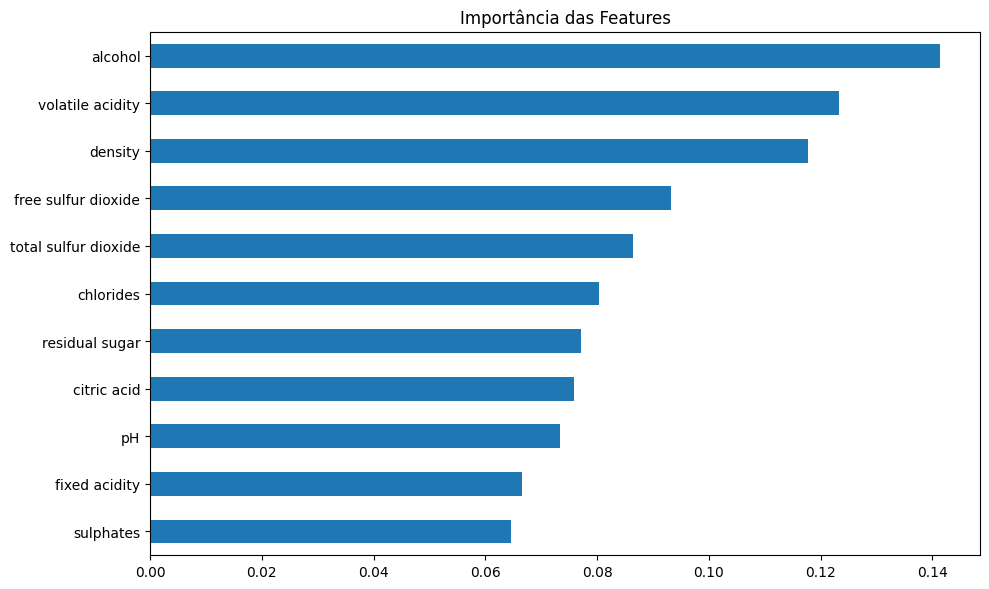

In [137]:
# Importância das features
# mostrar quais variáveis mais influenciaram a classificação

importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10,6), title="Importância das Features")
plt.tight_layout()
plt.show()

# Conclusão

A análise e o pré-processamento do dataset Wine Quality reforçaram a importância de compreender a estrutura dos dados antes de aplicar qualquer modelagem.

A etapa exploratória revelou correlações relevantes entre os atributos: algumas já esperadas, como a alta correlação entre densidade e açúcar residual, e outras mais surpreendentes — por exemplo, a baixa correlação entre densidade e qualidade, embora a densidade pudesse sugerir aspectos como corpo ou textura do vinho, que teoricamente influenciariam sua avaliação sensorial.

A aplicação de técnicas como normalização e padronização foi essencial para preparar as variáveis e garantir um desempenho mais justo e consistente dos modelos de machine learning.

Com base nisso, seguem as validações das hipóteses:

– Qual a correlação entre o teor alcoólico e o açúcar residual? Foi observada uma correlação negativa moderada de –0,45, indicando que, em geral, vinhos com mais açúcar residual tendem a ter menor teor alcoólico. Esse comportamento é coerente com o processo de fermentação: quanto mais completo, mais açúcar é convertido em álcool. Portanto, vinhos doces (com muito açúcar residual) geralmente passaram por fermentações menos intensas, enquanto vinhos secos, com pouco açúcar, tendem a apresentar maior graduação alcoólica.

– É possível distinguir vinhos de diferentes níveis de qualidade com base em suas características físico-químicas? Sim. Os resultados do MVP indicam que é possível identificar padrões físico-químicos associados à qualidade do vinho. Variáveis como teor alcoólico (positiva) e acidez volátil (negativa) mostraram relação direta com a nota atribuída. Embora o modelo tenha apresentado desempenho um pouco inferior na identificação de vinhos de menor qualidade, a acurácia geral de 83% sugere um bom potencial preditivo para aplicações iniciais.

– Vinhos bons são mais facilmente identificáveis? Sim. Os vinhos classificados como “bons” (nota ≥ 6) apresentaram um padrão químico mais homogêneo, o que facilitou a atuação do modelo. A taxa de acerto nessa classe foi superior, evidenciando que os vinhos bem avaliados compartilham características recorrentes. Já os vinhos com notas mais baixas demonstraram maior variabilidade nos atributos físico-químicos, tornando-se um desafio maior para os algoritmos de classificação.

